# Posts Over Time

I have redone the analysis for the horde messages.  This is primarily an exercise in data analysis in python (I need to get better for my new job), but also because there's always loads more you can do with text data!!

A good proportion of the code for this project is in cleaning the data, extracting the emoticons etc. but that was mind-numbingly tedious, so we'll just skip to the part where we have clean data.  We load in our data using pandas.

In [153]:
import os
import pandas as pd
import matplotlib
import math
from matplotlib import pyplot as plt
%matplotlib inline

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


__location__ = os.path.realpath((os.getcwd()))

raw_data = pd.read_csv(os.path.join(__location__, 'data/cleaned_data.csv'))
raw_data['date_time']  = pd.to_datetime(raw_data['date_time'])

user_messages = raw_data[raw_data['user']!='WhatsApp']
notifications = raw_data[raw_data['user']=='WhatsApp']

print 'loaded',len(user_messages),'user messages and',len(notifications),'WhatsApp notifications from file'

user_names = set(user_messages['user'])
min_day = raw_data['date_time'].min()
max_day = raw_data['date_time'].max()

loaded 19974 user messages and 136 WhatsApp notifications from file


In [155]:
print set(notifications.user)

set(['WhatsApp'])


Looking at how many users there are over time.  We build lists of date ranges for each user for when they were active (since some users have left and come back).  This is overkill for this graphic, but will be useful later.

In [152]:
join_notifications = notifications[[string[0:15] == 'USER_ENTERED : ' for string in notifications['message']]]
left_notifications = notifications[[s[0:12] == 'USER_LEFT : ' for s in notifications['message']]]

banned_notifications = notifications[["USER_BANNED" in s for s in notifications['message']]]
    
    
joined_dict={}
left_dict={}


def add_notification_to_dict(dictionary, table, chars_to_skip):
    for row in table.iterrows():
        user = row[1].get_value('message')[chars_to_skip:]
        print user
        date = row[1].get_value('date_time')
        if not dictionary.has_key(user):
            dictionary[user]=list()  
        dictionary[user].append(date)
        dictionary[user]= sorted(dictionary[user])

add_notification_to_dict(joined_dict, join_notifications, 15)
print "--"
add_notification_to_dict(left_dict, left_notifications, 12)
print "--"
add_notification_to_dict(left_dict, banned_notifications, 14)
print "--"
print joined_dict.keys()
print left_dict.keys()
user_date_ranges = {}
  

Shaggy
Marth
Dave
Bunn
Cate
Phil
Sam
Vanessa
Bongo
Hannah
Mike
Joe
Owen
Eliza
Tegan
Wills
Dan
Lora
Mateusz
Alan
Em
Krizia
Catrin
Wagg
Henry
Angela
Lorna
Sadie
Simone
Chris
Joe
Cate
Adimina
Vinay
Cate
Lora
Cate
Owen
Sam
Sam
Sadie
Loz
Lisa
Em
Tanya
Pete
Vanessa
Pete
Jimena
MikeJ
Steve
Sam T
Sadie
Sadie
Sadie
Bongo
Lora
Krizia
Cate
Mal
Owen
Alan
Luana
Cate
Owen
Phil
--
Joe
Wagg
Simone
Cate
Em
Lora
Cate
Lora
Cate
Vanessa
Sadie
Adimina
Em
Catrin
Phil
+44 7456 907114
Krizia
Loz
Cate
Owen
--
Cate
Owen
Sam
Sam
Pete
Sadie
Sadie
Sadie
Bongo
Owen
--
['Pete', 'Wagg', 'Cate', 'Eliza', 'Angela', 'Bunn', 'Tanya', 'Loz', 'Lora', 'Mike', 'Sadie', 'Vanessa', 'Catrin', 'Dan', 'Jimena', 'Alan', 'Dave', 'Joe', 'Chris', 'Wills', 'Krizia', 'Shaggy', 'Tegan', 'Phil', 'Marth', 'Mateusz', 'Henry', 'Lisa', 'Simone', 'Adimina', 'Em', 'Lorna', 'Bongo', 'Sam', 'Mal', 'Owen', 'Luana', 'MikeJ', 'Steve', 'Hannah', 'Vinay', 'Sam T']
['Em', 'Pete', 'Wagg', 'Owen', 'Cate', 'Sam', 'Sadie', 'Vanessa', 'Catrin', 'Phil', '+4

In [140]:
print max_day

2015-09-21 10:57:00


In [156]:
for user in joined_dict.keys():
    print user
    
    if not left_dict.has_key(user):
        left_dict[user] = [max_day]
    joined_list = joined_dict[user] 
    left_list = left_dict[user]
    if len(joined_list) > len(left_list):
        print len(joined_list), len(left_list)
        left_list.append(max_day)
    user_date_ranges[user]=[]
    
    print joined_list
    print left_list
    for index in range(len(joined_list)):
        
        
        dr = pd.date_range(joined_list[index], left_list[index])
        print joined_list[index], left_list[index]
        print dr
        user_date_ranges[user].append(dr)  

Pete
2 1
[Timestamp('2014-12-15 14:48:00'), Timestamp('2015-02-06 17:06:00')]
[Timestamp('2015-02-06 16:53:00'), Timestamp('2015-09-21 10:57:00')]
2014-12-15 14:48:00 2015-02-06 16:53:00
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-12-15 14:48:00, ..., 2015-02-06 14:48:00]
Length: 54, Freq: D, Timezone: None
2015-02-06 17:06:00 2015-09-21 10:57:00
<class 'pandas.tseries.index.DatetimeIndex'>
[2015-02-06 17:06:00, ..., 2015-09-21 17:06:00]
Length: 228, Freq: D, Timezone: None
Wagg
[Timestamp('2014-03-05 14:56:00')]
[Timestamp('2014-03-15 23:15:00')]
2014-03-05 14:56:00 2014-03-15 23:15:00
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-03-05 14:56:00, ..., 2014-03-15 14:56:00]
Length: 11, Freq: D, Timezone: None
Cate
6 5
[Timestamp('2013-09-28 17:33:00'), Timestamp('2014-08-30 15:31:00'), Timestamp('2014-10-18 12:32:00'), Timestamp('2014-10-20 07:28:00'), Timestamp('2015-07-03 17:45:00'), Timestamp('2015-09-04 22:10:00')]
[Timestamp('2014-08-30 15:30:00'), Timestamp('2014-10-04

In [ ]:
times = []
user_counts = []
for time in pd.date_range(start=min_day,end = max_day - pd.DateOffset(days =1),freq='3H'):
    times.append(time)
    count = 0
    for user in user_date_ranges.keys():
        for date_range in user_date_ranges[user]:
            if time > date_range.min() and time <= date_range.max():
                count += 1
    user_counts.append(count)
    

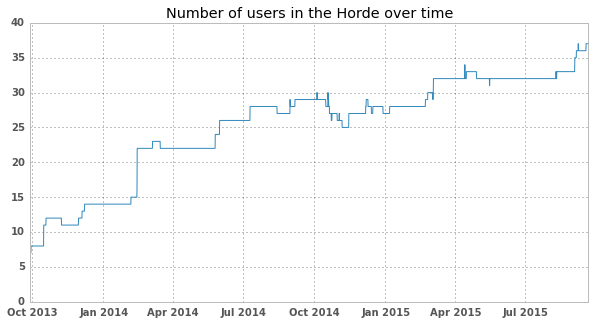

In [310]:
plt.figure(figsize=(10,5))
title("Number of users in the Horde")
plt.plot(times, user_counts)

We first look at how much each user has posted.  The graph package used is pyplot from mathplotlib


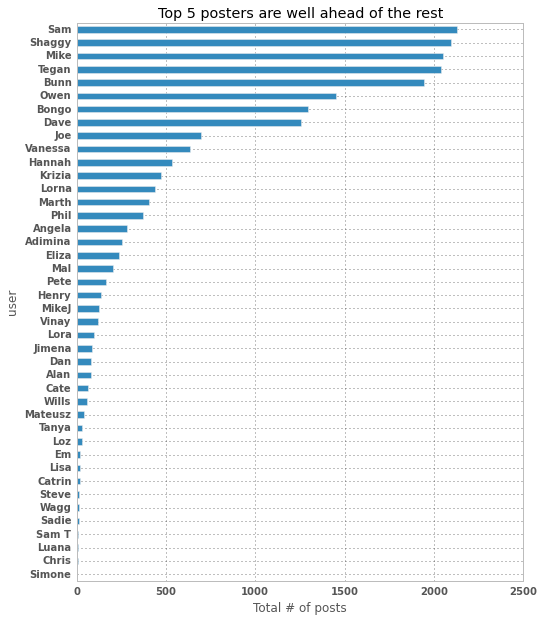

In [308]:
grouped_by_user = user_messages.groupby(['user'],as_index=False)
user_counts =  grouped_by_user['message'].agg({"count" : pd.Series.count})
user_counts.sort(columns = 'count', inplace = True)
plt.figure(figsize=(15,40))
user_counts.plot(x='user', y='count',kind='barh', figsize=(8, 10), legend = None)
title("Top 5 posters are well ahead of the rest")
xlabel("Total # of posts")
plt.show()

Next we create a table which has the number of days each user has been active for.

In [159]:
days_active_map = []
for user in user_names:
    print user
    new_dict ={"user":user}
    total= 0
    for date_range in user_date_ranges[user]:
        print date_range
        total += (date_range.max() - date_range.min()).days
    new_dict["days_active"]=total
    days_active_map.append(new_dict)
days_active_table = pd.DataFrame(days_active_map)

days_active_table.to_csv('data/days_active_table.csv',index = False)

Pete
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-12-15 14:48:00, ..., 2015-02-06 14:48:00]
Length: 54, Freq: D, Timezone: None
<class 'pandas.tseries.index.DatetimeIndex'>
[2015-02-06 17:06:00, ..., 2015-09-21 17:06:00]
Length: 228, Freq: D, Timezone: None
Wagg
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-03-05 14:56:00, ..., 2014-03-15 14:56:00]
Length: 11, Freq: D, Timezone: None
Cate
<class 'pandas.tseries.index.DatetimeIndex'>
[2013-09-28 17:33:00, ..., 2014-08-30 17:33:00]
Length: 337, Freq: D, Timezone: None
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-08-30 15:31:00, ..., 2014-10-04 15:31:00]
Length: 36, Freq: D, Timezone: None
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-10-18 12:32:00, 2014-10-19 12:32:00]
Length: 2, Freq: D, Timezone: None
<class 'pandas.tseries.index.DatetimeIndex'>
[2014-10-20 07:28:00]
Length: 1, Freq: D, Timezone: None
<class 'pandas.tseries.index.DatetimeIndex'>
[2015-07-03 17:45:00]
Length: 1, Freq: D, Timezone: None
<class 'pan

In [160]:
print user_names

set(['Pete', 'Wagg', 'Cate', 'Eliza', 'Angela', 'Bunn', 'Tanya', 'Loz', 'Lora', 'Mike', 'Simone', 'Vanessa', 'Catrin', 'Dan', 'Jimena', 'Alan', 'Dave', 'Joe', 'Vinay', 'Wills', 'Krizia', 'Shaggy', 'Tegan', 'Phil', 'Marth', 'Mateusz', 'Henry', 'Lisa', 'Adimina', 'Em', 'Lorna', 'Bongo', 'Sam', 'Mal', 'Chris', 'Owen', 'Luana', 'MikeJ', 'Steve', 'Hannah', 'Sadie', 'Sam T'])


Join table to number of posts table.  We add [Poisson confidence intervals](http://en.wikipedia.org/wiki/Poisson_distribution#Confidence_interval) for the rate of posts per day.

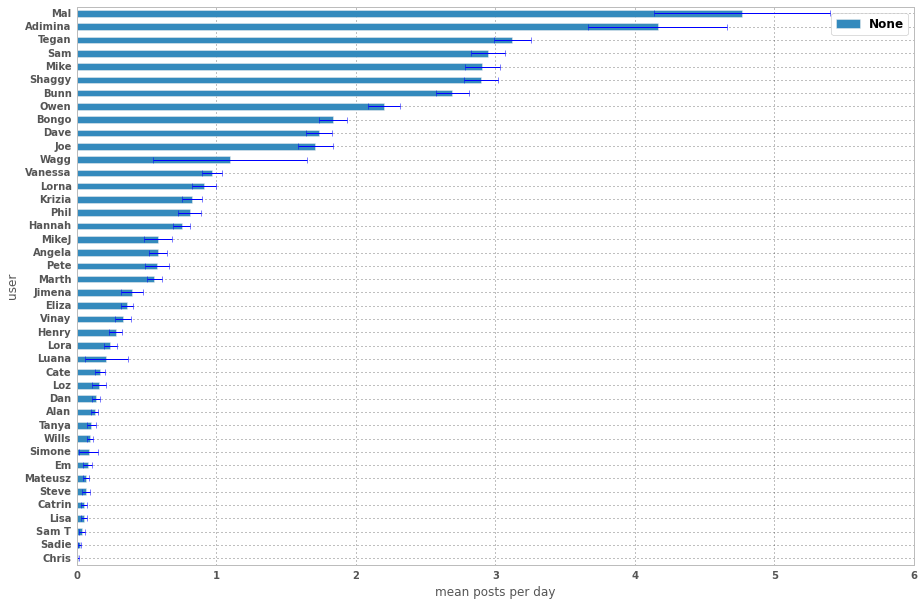

In [161]:
from scipy.special import gammaincinv
from pylab import *

user_post_freqs = pd.merge(user_counts, days_active_table, on = u'user')

def lower_poisson_CI(k, n, a):
    return gammaincinv (k, 0.5 * a) / n

def upper_poisson_CI(k, n, a):   
    return gammaincinv (k + 1, 1 - 0.5 * a)/n

a = 0.05

def get_poisson_CI(row, sample_nums, count_nums):
    n = row[1].get_value(sample_nums)
    count = row[1].get_value(count_nums) 
    mean = count * 1.0 / n
    return mean, mean-lower_poisson_CI(count, n, a), upper_poisson_CI(count, n, a)-mean

def get_binomial_CI(row, sample_nums, count_nums):
    n = row[1].get_value(sample_nums)
    count = row[1].get_value(count_nums) 
    mean = count * 1.0 / n
    return mean, mean-lower_poisson_CI(count, n, a), upper_poisson_CI(count, n, a)-mean

def create_barh_poisson_CIs(df, group_row, sample_nums, count_nums):
    CI_tuples = [get_poisson_CI(row, sample_nums, count_nums) for row in df.iterrows()]    
    df['mean']=[CI_tuple[0] for CI_tuple in CI_tuples]
    df['lower_CI']=[CI_tuple[1] for CI_tuple in CI_tuples]
    df['upper_CI']=[CI_tuple[2] for CI_tuple in CI_tuples]    
    df.sort(columns = 'mean', inplace = True,ascending = True)    
    assymetric_error = [df['lower_CI'].values,df['upper_CI'].values]
    df.plot(x=group_row, y='mean',kind='barh',xerr = assymetric_error, ecolor = 'b',figsize=(15,10))

create_barh_poisson_CIs(user_post_freqs, 'user', 'days_active','count')
xlabel('mean posts per day')



/home/mikesj/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mikesj/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


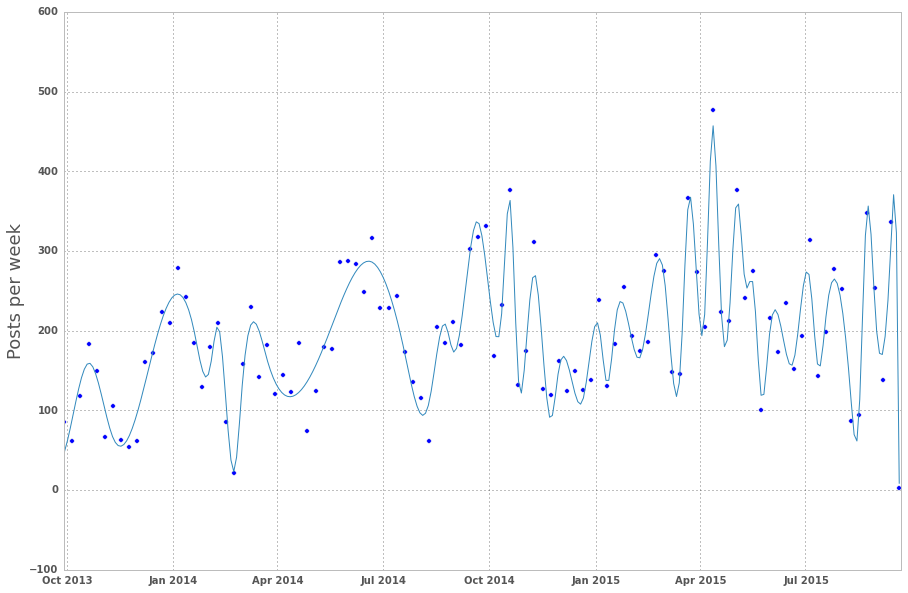

In [162]:
from datetime import datetime, timedelta, date
from scipy import interpolate 
from matplotlib.dates import num2date, date2num

user_messages['week_start'] = [dt.date() - timedelta(days= dt.isoweekday()) for dt in user_messages['date_time']]
user_messages['day'] = [dt.date() for dt in user_messages['date_time']]



grouped_by_week = user_messages.groupby(['week_start'])
grouped_by_day = user_messages.groupby(['day'])

weekly_counts = grouped_by_week['message'].agg({"count" : pd.Series.count})
daily_counts = grouped_by_day['message'].agg({"count" : pd.Series.count})
full_index = weekly_counts.index


weeks = date2num(weekly_counts.index.tolist())
days = date2num(daily_counts.index.tolist())

week_min, week_max = weeks.min(),weeks.max()
day_min, day_max = days.min(), days.max()

raw_weekly_counts = weekly_counts['count'].values
raw_day_counts = daily_counts['count'].values

xnew = np.linspace(week_min, week_max ,300)

power_smooth = interpolate.UnivariateSpline(weeks, raw_weekly_counts, s = 8e4)(xnew)

plt.figure(figsize=(15,10))

plt.plot(num2date(xnew),power_smooth)
plt.scatter(num2date(weeks), raw_weekly_counts)
xlim(min_day, max_day) 
ylabel('Posts per week', size = 18)


In [182]:
daily_counts['cum_count'] = np.cumsum(list(daily_counts['count']))

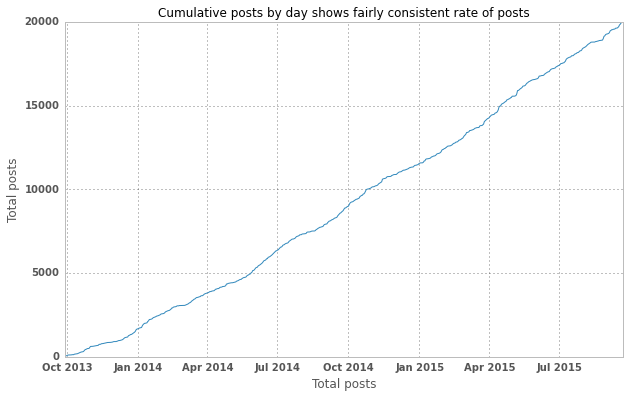

In [301]:
raw_day_cum = daily_counts['cum_count'].values
plt.figure(figsize=(10,6))
plt.plot(num2date(days), raw_day_cum)
xlim(min_day, max_day) 
ylim(0,20000)
ylabel('Total posts', size = 12)
xlabel('Total posts', size = 12)
title("Cumulative posts by day shows fairly consistent rate of posts", size = 12)

In [ ]:
raw_day_cum = daily_counts['cum_count'].values
plt.figure(figsize=(15,10))
plt.scatter(num2date(days), raw_day_cum)
xlim(min_day, max_day) 
ylim(0,20000)
ylabel('Total posts', size = 18)
xlabel('Total posts', size = 18)
title("Cumulative posts by day", size = 18)

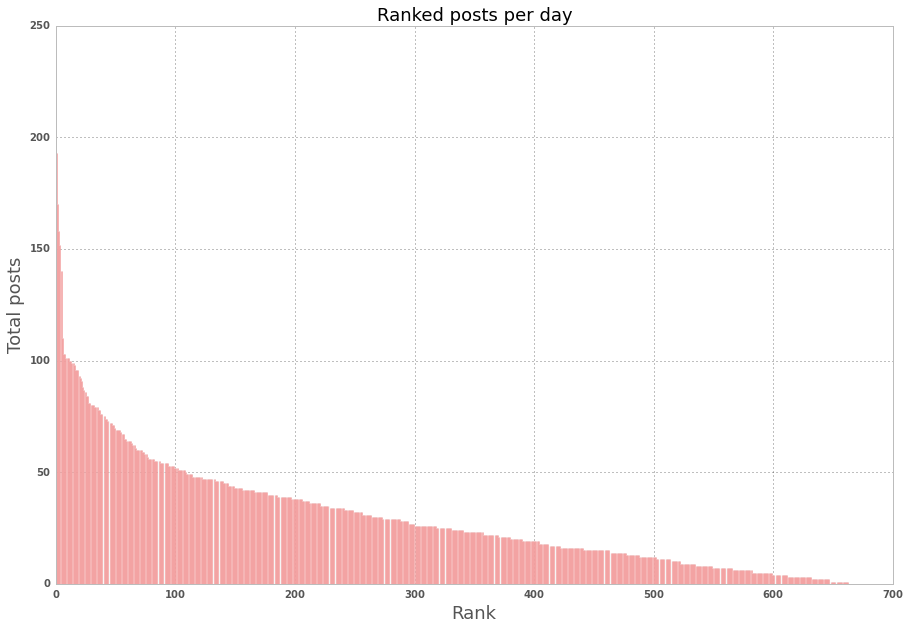

In [203]:
raw_day_count = daily_counts['count'].values
plt.figure(figsize=(15,10))
plt.bar(range(len(raw_day_count)), sorted(raw_day_count, reverse = True), color = 'red')
ylim(0,250)
ylabel('Total posts', size = 18)
xlabel('Rank', size = 18)
title("Ranked posts per day", size = 18)

In [206]:
print sum(sorted(raw_day_count, reverse = True))

19974


In [163]:
power_users = ['Bongo', 'Dave', 'Owen' ,'Bunn' ,'Mike' , 'Shaggy' ,'Tegan' ,'Sam', 'Adimina']
NUM_COLORS = len(power_users)

cm = plt.get_cmap('spectral')
color_cycle = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

color_dict = {}
for i, name in enumerate(power_users):
    color = cm(1.*i/NUM_COLORS)  # color will now be an RGBA tuple
    color_dict[name] = color


['Bongo', 'Dave', 'Owen', 'Bunn', 'Mike', 'Shaggy', 'Tegan', 'Sam', 'Adimina']
Adimina
254.0
Bongo
1297.0
Bunn
1945.0
Dave
1255.0
Mike
2052.0
Owen
1453.0
Sam
2128.0
Shaggy
2094.0
Tegan
2039.0


(0.1, 70.0)

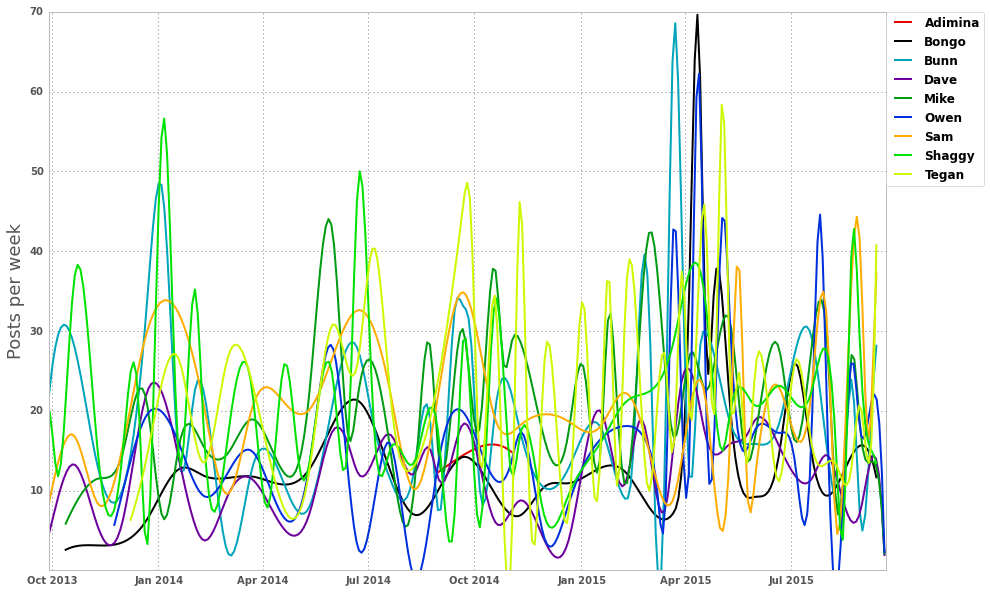

In [164]:
from datetime import date

print power_users
grouped_by_user = user_messages.groupby(['user'],as_index=False)

plt.figure(figsize=(15,10))
for name, group in grouped_by_user: 
    if name in power_users:     
        print name
        grouped_by_week = group.groupby(['week_start'])
        
        weekly_counts = grouped_by_week['message'].agg({"count" : pd.Series.count})  
        all_weekly_counts = weekly_counts.reindex(full_index)
        all_weekly_counts.fillna(0,inplace = True)
        weeks = date2num(weekly_counts.index.tolist())
        all_weeks = date2num(all_weekly_counts.index.tolist())
        
        weekly_counts = all_weekly_counts['count'].values       
        
        xnew = np.linspace(weeks.min(), weeks.max(),300)
        print sum(weekly_counts)
        power_smooth = interpolate.UnivariateSpline(\
                                all_weeks,              \
                                all_weekly_counts,      \
                                s= 4000 \
                                )(xnew) 
        #plt.scatter(num2date(weeks), weekly_counts,c = color_dict[name])
        plt.plot(num2date(xnew),power_smooth,linewidth=2,label = name, c = color_dict[name])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ylabel('Posts per week', size = 18)
#xlim(date(2014, 4, 1), max_day)
xlim(min_day, max_day)
ylim(0.1)

I kind of skipped looking at emojis last time, partially because I wasn't sure how WhatsApp handled them.  I spent some time learning about this, and converting everything to the correct unicode format (this.took.AGES).  First we extract the emoji's from the file.

/home/mikesj/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


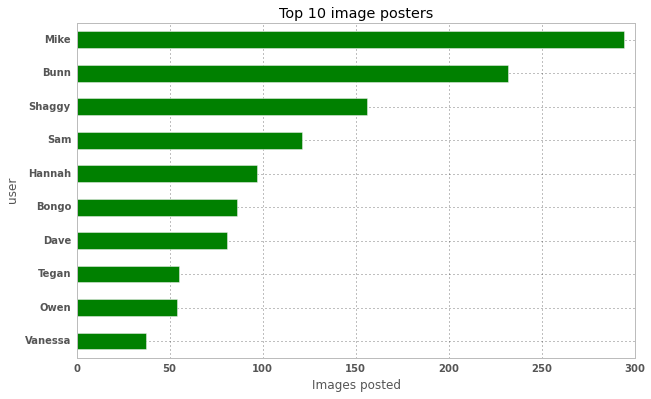

In [312]:
user_messages['image_count']= [string.count('[MEDIA]') for string in user_messages.message]
grouped_by_user = user_messages.groupby(['user'],as_index = False)
images_by_user = grouped_by_user.agg({'image_count' : np.sum})
images_by_user.sort(columns = 'image_count',inplace=True)

images_by_user[-10:].plot(x='user',y='image_count',kind = 'barh', legend = None, figsize=(10,6), color = 'green')
xlabel("Images posted")
title("Top 10 image posters")

In [12]:
import time
import datetime

In [14]:
print raw_data.date_time[3]

unixtime = time.mktime(raw_data.date_time[3].timetuple())

datetime.datetime.fromtimestamp(
        unixtime + 3600
    ).strftime('%Y-%m-%d %H:%M:%S')

2013-09-28 17:29:00


'2013-09-28 18:29:00'

In [16]:
unixtimes = [time.mktime(t.timetuple()) for t in raw_data.date_time]

In [22]:
def get_max_posts(unixtimes, window):
    start_index = 0
    end_index = 0
    best_count = 0
    best_start_index = 0
    
    while end_index < len(unixtimes) - 1:
        if unixtimes[end_index + 1] - unixtimes[start_index] < window:
            end_index += 1
        else:
            start_index += 1
        posts = end_index - start_index + 1
        if posts > best_count:
            best_count = posts
            best_start_index = start_index
    return best_count, best_start_index

In [25]:
raw_data.columns

Index([u'date_time', u'message', u'user', u'emoji'], dtype='object')

In [30]:
posts = list(raw_data.message)
max_posts, best_start_index = get_max_posts(unixtimes, 3600 * 24)
for i in range(best_start_index, best_start_index + max_posts):
    pass
    #print posts[i]
    
print max_posts

245


In [32]:
posts = list(raw_data.message)
max_posts, best_start_index = get_max_posts(unixtimes, 3600 * 3)
for i in range(best_start_index, best_start_index + max_posts):
    pass
    #print posts[i]
    
print max_posts

131


Most posts in 24 hour period : 245 - discussing results of 2015 general election

Mosts posts in 1 hour period : 131 - a standard Friday night shambles last year

In [289]:
lens =  [(index, len(m), user) for index, m, user in \
             zip(range(len(raw_data.message)),raw_data.message, raw_data.user) \
             if not "EMOJI" in m]
sort_posts = sorted(lens, key = lambda(x) : x[1] , reverse = True)

CHARS_TO_TAKE = 100

def shorten(s):
    return s[:CHARS_TO_TAKE] + " ...... " + s[-CHARS_TO_TAKE:]

print "Some stupidly long messages : "
print



for index, m, user in sort_posts[:12]:
    
    date = raw_data.date_time[index].strftime("%Y-%m-%d")
    message = raw_data.message[index]
    print user, ", ", date, ", ", len(message), "characters, "
    print shorten(message)
    print 
    

Some stupidly long messages : 

Mike ,  2014-10-30 ,  1538 characters, 
What the fuck did you just fucking say about me, you little bitch? I’ll have you know I graduated  ...... goddamn idiot. I will shit fury all over you and you will drown in it. You’re fucking dead, kiddo.

Jimena ,  2015-04-09 ,  956 characters, 
I personally think that any valid answer should be accepted as its the person writing the exams job  ...... phrase things differently. Btw the example before came from an Indian friend. (The one in the photo)

Owen ,  2015-03-26 ,  894 characters, 
Henry:. . The Bible clearly states that the sky is a solid dome, a firmament, which was firm enough  ...... on means apes popping out human babies. You'd think them evil-utionists'd have that straight by now.

Sam ,  2015-08-09 ,  825 characters, 
The Gun. 27 Coldharbour, London E14 9NS, United Kingdom. https://plus.google.com/1058266594293296470 ...... t route, or face the consequences!. Also blackwall is easy easier if you can

In [224]:
raw_data.columns

Index([u'date_time', u'message', u'user', u'emoji'], dtype='object')

In [210]:
max_

(20109, 3)

In [257]:
import math

def clean_chars(s, emoji):
    if not type(emoji) == float:
        for e in emoji.split(","):
            s = s.replace("EMOJI[%s]" %e, "E")
    return s.replace("[MEDIA] ", "")    
    
    
user_messages['char_count']= [len(clean_chars(s,e)) for s,e in zip(user_messages.message, user_messages.emoji)]
    


/home/mikesj/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


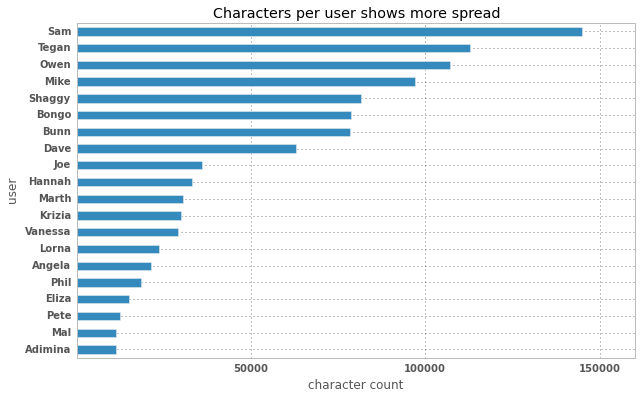

In [295]:
chars_by_user = user_messages.groupby("user")['char_count'].sum().reset_index(drop = False)

chars_by_user.sort(columns = 'char_count',inplace=True)

plt.figure(figsize=(10,10))
chars_by_user[-20:].plot(x='user',y='char_count',kind = 'barh', figsize=(10,6), legend=None)
xticks([5e4,10e4,15e4])
xlabel("character count")
title("Characters per user shows more spread")